# Clustering
후보군 subset 생성  
clustering을 진행할 떈 count_cust계수를 고려하지 않고 일단 위치만을 고려

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
DF1_FILENAME = '4.ev_resident+ev_activity+ev_activity_resident.csv'
DF1_FILEPATH = os.path.join(os.path.dirname(os.getcwd()),'data','dataset',DF1_FILENAME)

df = pd.read_csv(DF1_FILEPATH, index_col=0) # 거주자, 활동자 기준 전기차앱 실행

In [3]:
df.shape[0]

457720

In [4]:
df

,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust,table
0,20220614,2,4146,용인시,41461256,이동읍,87958702,127.216920,37.188220,MALE,12,EV라운지,4,3.829,1
1,20220613,1,4146,용인시,41463570,마북동,85431116,127.127350,37.303352,MALE,14,EV라운지,1,9.994,1
2,20220602,4,4146,용인시,41463575,동백2동,86198990,127.154590,37.268280,MALE,14,EV라운지,4,7.502,1
3,20220606,1,4146,용인시,41461259,남사읍,86854741,127.178110,37.174600,MALE,9,EV라운지,4,3.234,1
4,20220608,3,4146,용인시,41465540,죽전1동,85159183,127.117645,37.325855,FEMALE,10,EV라운지,5,3.315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457715,20220629,3,4146,용인시,41463550,서농동,84071038,127.079800,37.229730,MALE,8,EV라운지,6,3.549,2
457716,20220606,1,4146,용인시,41465570,상현1동,83831210,127.070946,37.300457,MALE,9,EV라운지,4,8.156,2
457717,20220615,3,4146,용인시,41463550,서농동,83847056,127.071900,37.231503,MALE,5,EV라운지,5,3.387,2
457718,20220629,3,4146,용인시,41463550,서농동,83943045,127.075294,37.229260,MALE,8,EV라운지,2,5.128,2


## K-Means Clustering

### K-Means Clustering(K = 1000)

cell_id를 기준으로 병합을 진행

In [6]:
df_tmp = df.loc[:,['cell_id','cell_xcrd','cell_ycrd', 'table']].drop_duplicates()

In [7]:
df_tmp

,cell_id,cell_xcrd,cell_ycrd,table
0,87958702,127.216920,37.188220,1
1,85431116,127.127350,37.303352,1
2,86198990,127.154590,37.268280,1
3,86854741,127.178110,37.174600,1
4,85159183,127.117645,37.325855,1
...,...,...,...,...
457599,85510782,127.130890,37.155083,2
457655,86103003,127.151190,37.271423,2
457679,87030893,127.184000,37.248080,2
457691,84807207,127.105225,37.326714,2


In [8]:
n_cluster = 1000

# 최종 모델 학습
kmeans = KMeans(n_clusters=n_cluster, max_iter=50, random_state=1)
kmeans.fit(df_tmp.loc[:,['cell_xcrd','cell_ycrd']])

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

df_k1000 = df_tmp.assign(cluster = cluster_labels)

In [9]:
df_k1000.head()

,cell_id,cell_xcrd,cell_ycrd,table,cluster
0,87958702,127.216920,37.188220,1,531
1,85431116,127.127350,37.303352,1,483
2,86198990,127.154590,37.268280,1,348
3,86854741,127.178110,37.174600,1,225
4,85159183,127.117645,37.325855,1,247


In [10]:
df_k1000.cluster.value_counts()

69     94
690    79
175    69
200    67
612    66
       ..
750     1
308     1
182     1
3       1
283     1
Name: cluster, Length: 1000, dtype: int64

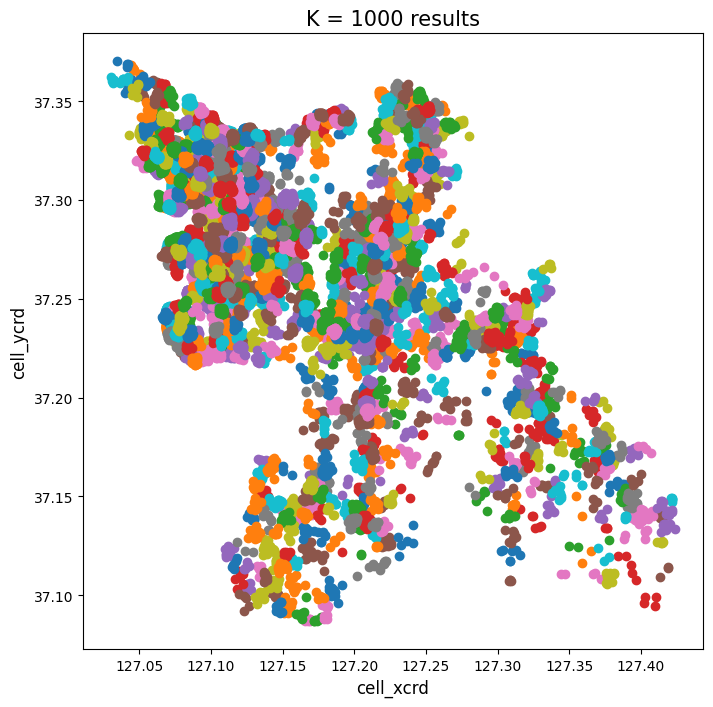

In [11]:
plt.figure(figsize = (8, 8))

for i in range(n_cluster):
    plt.scatter(df_k1000.loc[df_k1000['cluster'] == i, 'cell_xcrd'], df_k1000.loc[df_k1000['cluster'] == i, 'cell_ycrd'], 
                label = 'cluster' + str(i))

plt.title(f'K = {n_cluster} results' , size = 15)
plt.xlabel('cell_xcrd', size = 12)
plt.ylabel('cell_ycrd', size = 12)
plt.show()

In [12]:
df # cluster label 추가하기 전

,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_id,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust,table
0,20220614,2,4146,용인시,41461256,이동읍,87958702,127.216920,37.188220,MALE,12,EV라운지,4,3.829,1
1,20220613,1,4146,용인시,41463570,마북동,85431116,127.127350,37.303352,MALE,14,EV라운지,1,9.994,1
2,20220602,4,4146,용인시,41463575,동백2동,86198990,127.154590,37.268280,MALE,14,EV라운지,4,7.502,1
3,20220606,1,4146,용인시,41461259,남사읍,86854741,127.178110,37.174600,MALE,9,EV라운지,4,3.234,1
4,20220608,3,4146,용인시,41465540,죽전1동,85159183,127.117645,37.325855,FEMALE,10,EV라운지,5,3.315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457715,20220629,3,4146,용인시,41463550,서농동,84071038,127.079800,37.229730,MALE,8,EV라운지,6,3.549,2
457716,20220606,1,4146,용인시,41465570,상현1동,83831210,127.070946,37.300457,MALE,9,EV라운지,4,8.156,2
457717,20220615,3,4146,용인시,41463550,서농동,83847056,127.071900,37.231503,MALE,5,EV라운지,5,3.387,2
457718,20220629,3,4146,용인시,41463550,서농동,83943045,127.075294,37.229260,MALE,8,EV라운지,2,5.128,2


In [13]:
df_k1000 = pd.merge(df_k1000.loc[:,['cell_id', 'cluster', 'table']], df, how='left', on=['cell_id', 'table'])
df_k1000

,cell_id,cluster,table,base_dt,dow,ccw_cd,ccw_nm,adng_cd,adng_nm,cell_xcrd,cell_ycrd,gender,age,app_web,time_zone,count_cust
0,87958702,531,1,20220614,2,4146,용인시,41461256,이동읍,127.216920,37.188220,MALE,12,EV라운지,4,3.829
1,87958702,531,1,20220629,3,4146,용인시,41461256,이동읍,127.216920,37.188220,MALE,12,EV라운지,4,3.829
2,87958702,531,1,20220630,4,4146,용인시,41461256,이동읍,127.216920,37.188220,MALE,12,EV라운지,4,3.829
3,87958702,531,1,20220616,4,4146,용인시,41461256,이동읍,127.216920,37.188220,MALE,12,EV Infra,5,3.829
4,87958702,531,1,20220615,3,4146,용인시,41461256,이동읍,127.216920,37.188220,MALE,12,EV라운지,4,3.829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457715,85510782,921,2,20220621,2,4146,용인시,41461259,남사읍,127.130890,37.155083,MALE,10,EV라운지,1,14.280
457716,86103003,492,2,20220625,6,4146,용인시,41463575,동백2동,127.151190,37.271423,FEMALE,11,하이차저,4,8.554
457717,87030893,942,2,20220621,2,4146,용인시,41461520,역삼동,127.184000,37.248080,MALE,8,EV라운지,4,3.346
457718,84807207,233,2,20220608,3,4146,용인시,41465550,죽전2동,127.105225,37.326714,FEMALE,10,EV라운지,4,4.055


## 위 clustering 반복 진행

In [14]:
def save_clustering(n_cluster, random_seed):
    # 최종 모델 학습
    kmeans = KMeans(n_clusters=n_cluster, max_iter=50, random_state=random_seed)
    kmeans.fit(df_tmp.loc[:,['cell_xcrd','cell_ycrd']])

    # 고객별 클러스터 지정
    cluster_labels = kmeans.labels_

    df_k = df_tmp.assign(cluster = cluster_labels)
    
    print(df_k.cluster.value_counts())
    print()
    
    # 병합 후 저장 진행
    df_k = pd.merge(df_k.loc[:,['cell_id', 'cluster', 'table']], df, how='left', on=['cell_id', 'table'])
    
    df_k.to_csv(f'../data/dataset/5.df_k{n_cluster}_clustering.csv')
    return df_k

In [14]:
for i in range(50,60):
    save_clustering(n_cluster=i*100, random_seed=i)

1       17
519     17
793     17
58      16
174     16
        ..
4935     1
4209     1
2262     1
3630     1
1796     1
Name: cluster, Length: 5000, dtype: int64

1149    17
164     17
2808    17
2298    16
815     16
        ..
1383     1
768      1
3913     1
50       1
3637     1
Name: cluster, Length: 5100, dtype: int64

581     17
242     16
3113    16
2221    16
2289    16
        ..
4274     1
4805     1
4460     1
3353     1
4233     1
Name: cluster, Length: 5200, dtype: int64

2125    16
2197    16
2522    16
1791    16
2669    16
        ..
5166     1
2263     1
3894     1
4427     1
3802     1
Name: cluster, Length: 5300, dtype: int64

917     17
1312    16
1827    16
2656    16
1210    16
        ..
4431     1
4335     1
736      1
1653     1
1618     1
Name: cluster, Length: 5400, dtype: int64

281     15
1158    15
2854    15
1610    15
1041    15
        ..
405      1
4597     1
4078     1
1851     1
2107     1
Name: cluster, Length: 5500, dtype: int64

1012    17
1961 